In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from sklearn.metrics import roc_curve, auc

from LSSVM import LSSVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def print_error_matrix(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    F1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

    # MCC
    denom = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    mcc = ((tp * tn) - (fp * fn)) / denom if denom > 0 else 0

    print(f"Accuracy:     {accuracy:.4f}")
    print(f"F1:           {F1:.4f}")
    print(f"Precision:    {precision:.4f}")
    print(f"Sensitivity:  {sensitivity:.4f}")
    print(f"Specificity:  {specificity:.4f}")
    print(f"MCC:          {mcc:.4f}")
    print(f"TP:           {tp}")
    print(f"FP:           {fp}")
    print(f"TN:           {tn}")
    print(f"FN:           {fn}")
    print("         Pred 0    Pred 1")
    print(f"True 0    {tn:4}     {fp:4}")
    print(f"True 1    {fn:4}     {tp:4}")


def plot_ROC(fpr,tpr,roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywa ROC')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

In [7]:
train=pd.read_csv("dataset_train.csv")
test=pd.read_csv("dataset_test.csv")

test['arrytmia'] = test['arrytmia'].apply(lambda x: 1 if x > 1 else x)
train['arrytmia'] = train['arrytmia'].apply(lambda x: 1 if x > 1 else x)


scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

test = pd.DataFrame(scaler.transform(test), columns=test.columns)



X_train = train.iloc[: ,1:].values
y_train = train['arrytmia'].values

X_test = test.iloc[: ,1:].values
y_test = test['arrytmia'].values

In [5]:
_, X_val, _, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.72      0.14      0.23      1565
         1.0       0.78      0.98      0.87      4952

    accuracy                           0.78      6517
   macro avg       0.75      0.56      0.55      6517
weighted avg       0.77      0.78      0.72      6517

Accuracy:     0.7801
F1:           0.8717
Precision:    0.7831
Sensitivity:  0.9828
Specificity:  0.1387
MCC:          0.2469
TP:           4867
FP:           1348
TN:           217
FN:           85
         Pred 0    Pred 1
True 0     217     1348
True 1      85     4867


## DecisionTree

In [43]:
clf = DecisionTreeClassifier(max_depth=30)  
clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test) 
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.72      0.14      0.23      1565
         1.0       0.78      0.98      0.87      4952

    accuracy                           0.78      6517
   macro avg       0.75      0.56      0.55      6517
weighted avg       0.77      0.78      0.72      6517

Accuracy:     0.7801
F1:           0.8717
Precision:    0.7831
Sensitivity:  0.9828
Specificity:  0.1387
MCC:          0.2469
TP:           4867
FP:           1348
TN:           217
FN:           85
         Pred 0    Pred 1
True 0     217     1348
True 1      85     4867


## RandomForest

In [44]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.92      0.02      0.04      1565
         1.0       0.76      1.00      0.87      4952

    accuracy                           0.76      6517
   macro avg       0.84      0.51      0.45      6517
weighted avg       0.80      0.76      0.67      6517

Accuracy:     0.7648
F1:           0.8659
Precision:    0.7639
Sensitivity:  0.9994
Specificity:  0.0224
MCC:          0.1221
TP:           4949
FP:           1530
TN:           35
FN:           3
         Pred 0    Pred 1
True 0      35     1530
True 1       3     4949


## klasyfikator Naive Bayes

In [45]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.66      0.28      0.40      1565
         1.0       0.81      0.95      0.87      4952

    accuracy                           0.79      6517
   macro avg       0.73      0.62      0.64      6517
weighted avg       0.77      0.79      0.76      6517

Accuracy:     0.7922
F1:           0.8746
Precision:    0.8079
Sensitivity:  0.9532
Specificity:  0.2831
MCC:          0.3312
TP:           4720
FP:           1122
TN:           443
FN:           232
         Pred 0    Pred 1
True 0     443     1122
True 1     232     4720


## Neural Network

In [11]:
def custom_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(1024, activation='relu'), 
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'), 
    layers.Dense(1, activation='sigmoid') 
])

scheduler = LearningRateScheduler(custom_scheduler)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test),callbacks=[scheduler])

Epoch 1/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7808 - loss: 0.4356 - val_accuracy: 0.7368 - val_loss: 0.7889 - learning_rate: 0.0010
Epoch 2/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8358 - loss: 0.3473 - val_accuracy: 0.4880 - val_loss: 1.3250 - learning_rate: 0.0010
Epoch 3/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8477 - loss: 0.3300 - val_accuracy: 0.6115 - val_loss: 1.2813 - learning_rate: 0.0010
Epoch 4/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8559 - loss: 0.3097 - val_accuracy: 0.5866 - val_loss: 1.7200 - learning_rate: 0.0010
Epoch 5/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8576 - loss: 0.3027 - val_accuracy: 0.6043 - val_loss: 1.2761 - learning_rate: 0.0010
Epoch 6/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8651 - loss: 0.2906 - val_accuracy: 0.5596 - val_loss: 1.4367 - learning_rate: 9.0484e-04
Epoch 7/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8763 - loss: 0.267

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


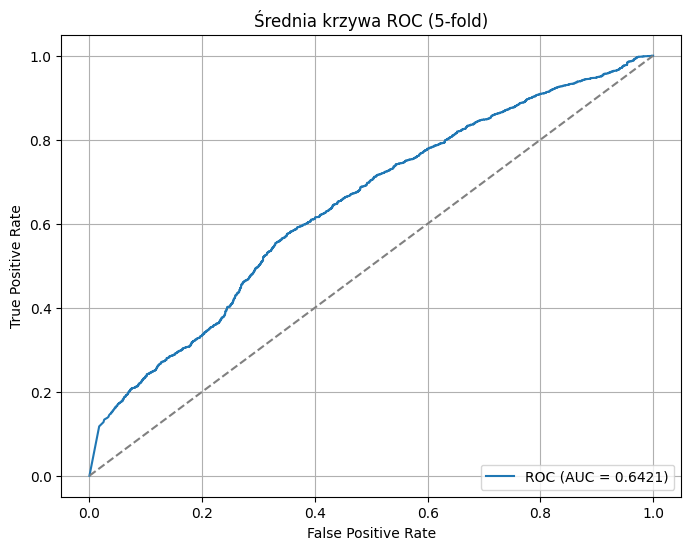

In [12]:
y_probs = model.predict(X_test).ravel()  

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plot_ROC(fpr,tpr,roc_auc)

In [19]:
THRESHOLD=0.9

y_pred = model.predict(X_test)
y_pred = (y_pred > THRESHOLD).astype('int32')
print(classification_report(y_test, y_pred))

confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
print_error_matrix(y_test,y_pred)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.29      0.73      0.42      1565
         1.0       0.84      0.45      0.58      4952

    accuracy                           0.52      6517
   macro avg       0.57      0.59      0.50      6517
weighted avg       0.71      0.52      0.54      6517

Accuracy:     0.5156
F1:           0.5839
Precision:    0.8406
Sensitivity:  0.4473
Specificity:  0.7316
MCC:          0.1557
TP:           2215
FP:           420
TN:           1145
FN:           2737
         Pred 0    Pred 1
True 0    1145      420
True 1    2737     2215


## XGBoost

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.38      0.40      0.39      1565
         1.0       0.81      0.79      0.80      4952

    accuracy                           0.70      6517
   macro avg       0.59      0.59      0.59      6517
weighted avg       0.70      0.70      0.70      6517

Accuracy:     0.6979
F1:           0.7996
Precision:    0.8062
Sensitivity:  0.7930
Specificity:  0.3968
MCC:          0.1866
TP:           3927
FP:           944
TN:           621
FN:           1025
         Pred 0    Pred 1
True 0     621      944
True 1    1025     3927


## LightGBM

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

[LightGBM] [Info] Number of positive: 48290, number of negative: 16524
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7183
[LightGBM] [Info] Number of data points in the train set: 64814, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.745055 -> initscore=1.072411
[LightGBM] [Info] Start training from score 1.072411
              precision    recall  f1-score   support

         0.0       0.43      0.41      0.42      1565
         1.0       0.82      0.83      0.82      4952

    accuracy                           0.73      6517
   macro avg       0.62      0.62      0.62      6517
weighted avg       0.72      0.73      0.73      6517

Accuracy:     0.7282
F1:           0.8226
Precision:    0.8163
Sensitivity:  0.8290
Specificity:  0.4096
MCC:          0.2428
TP:           4105
FP:           924
TN:           641


c:\Users\Kuba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## CatBoost

In [ ]:
model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.47      0.35      0.40      1565
         1.0       0.81      0.87      0.84      4952

    accuracy                           0.75      6517
   macro avg       0.64      0.61      0.62      6517
weighted avg       0.73      0.75      0.74      6517

Accuracy:     0.7485
F1:           0.8408
Precision:    0.8099
Sensitivity:  0.8742
Specificity:  0.3508
MCC:          0.2503
TP:           4329
FP:           1016
TN:           549
FN:           623
         Pred 0    Pred 1
True 0     549     1016
True 1     623     4329


## SVM

In [4]:
from sklearn.preprocessing import StandardScaler

# Wczytanie danych
train = pd.read_csv("dataset_train.csv")
test = pd.read_csv("dataset_test.csv")

# Przekształcenie kolumny 'arrytmia'
test['arrytmia'] = test['arrytmia'].apply(lambda x: 1 if x > 1 else x)
train['arrytmia'] = train['arrytmia'].apply(lambda x: 1 if x > 1 else x)

test['arrytmia'] = test['arrytmia'].apply(lambda x: -1 if x == 0 else x)
train['arrytmia'] = train['arrytmia'].apply(lambda x: -1 if x == 0 else x)

# Przygotowanie danych
X_train = train.iloc[:, 1:]  # zakładam, że pierwsza kolumna to np. indeks/czas
y_train = train['arrytmia'].values

X_test = test.iloc[:, 1:]
y_test = test['arrytmia'].values

# Normalizacja
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [6]:
clf = SVC(kernel='linear')  # 'rbf', 'poly', 'sigmoid'
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

          -1       0.46      0.59      0.51      1565
           1       0.86      0.78      0.82      4952

    accuracy                           0.73      6517
   macro avg       0.66      0.68      0.66      6517
weighted avg       0.76      0.73      0.74      6517

Accuracy:     0.7330
F1:           0.8160
Precision:    0.8566
Sensitivity:  0.7791
Specificity:  0.5872
MCC:          0.3387
TP:           3858
FP:           646
TN:           919
FN:           1094
         Pred 0    Pred 1
True 0     919      646
True 1    1094     3858


In [ ]:
from neo_ls_svm import NeoLSSVM

model = NeoLSSVM().fit(X_train, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

              precision    recall  f1-score   support

         0.0       0.24      0.58      0.34      1565
         1.0       0.75      0.40      0.53      4952

    accuracy                           0.45      6517
   macro avg       0.49      0.49      0.43      6517
weighted avg       0.63      0.45      0.48      6517

Accuracy:     0.4470
F1:           0.5263
Precision:    0.7538
Sensitivity:  0.4043
Specificity:  0.5821
MCC:          -0.0118
TP:           2002
FP:           654
TN:           911
FN:           2950
         Pred 0    Pred 1
True 0     911      654
True 1    2950     2002
